# Table of Contents
  - [1. Introduction & Data Description](#1-introduction-and-data-description)
  - [2. Data Importation](#2-data-importation)
    - [2.1. Import necessary libraries and dataset](#21-import-necessary-libraries-and-dataset)
    - [2.2. Convert the audio files into WAV](#22-convert-the-audio-files-into-wav)
    - [2.3. Reduce and resample the audio files](#23-reduce-and-resample-the-audio-files)
  - [3. Exploratory Data Analysis & Preprocessing](#3-exploratory-data-analysis-and-preprocessing)
    - [3.1. Load a sample from each dataset](#31-load-a-sample-from-each-dataset)
    - [3.2. Plot sample wave forms](#32-plot-sample-wave-forms)
    - [3.3. Plot sample pitch contour](#33-plot-sample-pitch-contour)
    - [3.4. Plot sample RMS](#34-plot-sample-rms)
    - [3.5. Plot sample ZCR](#35-plot-sample-zcr)
    - [3.6. Summary of the plots](#36-summary-of-the-plots)
    - [3.7. Identify potential bias by determining average length of each categories](#37-identify-potential-bias-by-determining-average-length-of-each-categories)
    - [3.8. Extract accoustic parameters](#38-extract-accoustic-parameters)
  - [4. Task Description & Data Split](#4-task-description-and-data-split)
    - [4.1. Define a function extracting accoustic parameters from each directory](#41-define-a-function-extracting-accoustic-parameters-from-each-directory)
    - [4.2. Perform necessary data split after extracting features](#42-perform-necessary-data-split-after-extracting-features)
    - [4.3. Plot sample Mel sepctrograms](#43-plot-sample-mel-sepctrograms)
    - [4.4. Convert audio files to Mel spectrograms](#44-convert-audio-files-to-mel-spectrograms)
    - [4.5. Perform necessary data split for spectrograms](#45-perform-necessary-data-split-for-spectrograms)
  - [5. Model Selection](#5-model-selection)
    - [5.1. Pseudocode for Decision Tree](#51-pseudocode-for-decision-tree)
    - [5.2. Decision Tree Implementation](#52-decision-tree-implementation)
    - [5.3. Pseudocode for Logistic Regression](#53-pseudocode-for-logistic-regression)
    - [5.4. Logistic Regression Implementation](#54-logistic-regression-implementation)
    - [5.5. Pseudocode for CNN](#55-pseudocode-for-cnn)
    - [5.6. CNN Implementation](#56-cnn-implementation)
    - [5.7. Pseudocode for CRNN](#57-pseudocode-for-crnn)
    - [5.8. CRNN Implementation](#58-crnn-implementation)
  - [6. Model Training](#6-model-training)
    - [6.1. Conduct Hyperparameter tuning for Decision Tree](#61-conduct-hyperparameter-tuning-for-decision-tree)
    - [6.2. Decision Tree training](#62-decision-tree-training)
    - [6.3. Logistic Regression training](#63-logistic-regression-training)
    - [6.4. CNN model training](#64-cnn-model-training)
    - [6.5. CRNN model training](#65-crnn-model-training)
  - [7. Prediction & Performance](#7-prediction-and-performance)
    - [7.1 Decision Tree model performance](#71-decision-tree-model-performance)
    - [7.2. Logistic Regression model performance](#72-logistic-regression-model-performance)
    - [7.3. CNN model performance](#73-cnn-model-performance)
    - [7.4. CRNN model performance](#74-crnn-model-performance)
  - [8. Visualization & Conclusion](#8-visualization-and-conclusion)
    - [8.1. Confusion matrix of Decision Tree](#81-confusion-matrix-of-decision-tree)
    - [8.2. ROC Curve of Decision Tree](#82-roc-curve-of-decision-tree)
    - [8.3. Confusion matrix of Logistic Regression](#83-confusion-matrix-of-logistic-regression)
    - [8.4. ROC curve of Logistic Regression](#84-roc-curve-of-logistic-regression)
    - [8.5. Confusion matrix of CNN](#85-confusion-matrix-of-cnn)
    - [8.6. ROC curve of CNN](#86-roc-curve-of-cnn)
    - [8.7. Confusion matrix of CRNN](#87-confusion-matrix-of-crnn)
    - [8.8. ROC curve of RCNN](#88-roc-curve-of-rcnn)
    - [8.5. Conclusion](#85-conclusion))
  - [9. Executive Summary](#9-executive-summary)
  - [10. References](#10-references)


## 1. Introduction & Data Description

In this project, I aim to build a machine learning model to classify my voice and my roommate's voice. Although this is our first semester rooming together, many people at Minerva have struggled to tell us apart since our first year. We share several similarities: we are both from Seoul, our names start with "Ha," we both major in Computational Science and minor in Economics, and we both began as part of the M24 cohort and returned as M26s after completing military service. I understand how these overlapping attributes could lead to confusion. While in-person confusion is less frequent, it becomes more common during classes on Forum, where people rely primarily on our face features and voices. “Hayoung! Ah, sorry, Haechan.” But are our voices really so similar that they are hard to distinguish just by listening? *What if we say... (Prof. Watson's voice) - our voices are actually very different and Minervans are just being ignorant to us?*

By developing voice classification models, I hope to explore whether machine learning can effectively resolve these challenges in voice identification. For the initial pipeline, I chose decision tree and logistic regression. The performance of each model will be evaluated using confusion matrix, ROC/AUC curve, accuracy, precision, recall, and f-1 score.

For the first assignment, the dataset consisted of recorded audio samples from both me and Haechen, with 60 sentences selected from a well-known Korean essay, resulting in a total of 120 short spoken phrases. However, I realized that there is a possibility that our accents are more similar in English and it might play a major factor on many people's confusion.

Therefore, in the second assignment, I decided to add new samples that contain English. Haechan and I recorded 60 sentences selected from three poems, The Road Not Taken by Robert Frost, Invictus by William Ernest Henley, and On Living by Nâzim Hikmet. This resulted in a total of 120 short spoken phrases.

As a result, the final dataset consists of 240 short spoken phrases from both Korean and English. To control for environmental variables, all recordings were conducted on the same day, in the same location, using identical equipment. The audio files were initially recorded in M4A format but were later converted to WAV using FFmpeg, making them more suitable for machine learning processing.


The whole dataset is available in the following link: <br>
https://drive.google.com/drive/folders/14LmEnY3qKRN4MfXYKApr12P96t5C48t6?usp=sharing

## 2. Data Importation

### 2.1. Import necessary libraries and dataset


In [ ]:
!pip3 install tensorflow_io
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import subprocess
import numpy as np
import librosa
import librosa.display
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


- Since it was not possible to properly install tensorflow_io in Macbook Pro M1, I decided to upload every file on Google Drive and and utilize Google Colab to avoid further dependency issues. The relevant directory was mounted in the Colab notebook.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CS156/assignment_1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS156/assignment_1


### 2.2. Convert the audio files into WAV


The original format of the audio files I collected was M4A. The primary reason why I decided to convert them into WAV is because it stores audio data in Pulse-Code Modulation (PCM), which is a raw representation of audio signals. This makes it ideal for machine learning applications, as the unprocessed waveform can be directly transformed into useful features like spectrograms or Mel-Frequency Cepstral Coefficients (MFCCs) without additional decoding steps. Additionally, WAV files are often used with fixed sampling rates (e.g., 44.1 kHz or 16 kHz) and channel configuraion (mono or stereo), ensuring uniformity across the dataset. This consistency is crucial for training models since variations in sampling rates or channels could introduce unwanted noise and degrade performance. The original M4A files were deleted after the conversion as they are not needed anymore.

In [ ]:
def convert_m4a_to_wav(folder_path):

    # Loop through all files in the input folder
    for filename in os.listdir(folder_path):
            try:
                m4a_path = os.path.join(folder_path, filename)
                wav_path = os.path.join(folder_path, filename.replace(".m4a", ".wav"))

                # Use ffmpeg to convert m4a to wav
                subprocess.run(
                    ["ffmpeg", "-i", m4a_path, wav_path],
                    check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE
                )
            except subprocess.CalledProcessError as e:
                print(f"Error converting '{filename}': {e.stderr.decode()}")

    print(f"Files for '{folder_path}' converted successfully")

In [ ]:
# convert_m4a_to_wav(os.path.join('data', 'hayoung'))
# convert_m4a_to_wav(os.path.join('data', 'haechan'))

### 2.3. Reduce and resample the audio files

The next step is defining a function that mainly takes two roles - reducing the audio to mono channel and resampling it to 16kHz.
- The main reason for using mono channel is to ensure uniformity across the dataset. If some recordings are mono and others are stereo, models may struggle with inconsistent input shapes (1D vs. 2D arrays). Another noteable advantage would be reduced training time and GPU/CPU usage. While mono audio is represented by one waveform (single time series), Stereo audio has two channels (left and right), doubling the data size and complexity.
- The sampling rate of 16kHz means that the audio signal is sampled 16,000 times per second. Each of these samples represents the amplitude (or intensity) of the sound wave at a specific moment in time. In general, 8kHz is considered to be suitable for speech processing, since most human speech falls below this range. Then why bother setting the rate to 16kHz? The reason lies in Nyquist-Shannon Sampling Theorem. The theorem states that to accurately capture and reconstruct a signal without losing any information, the sampling rate must be at least twice the highest frequency in the signal:

$$f_s \geq 2 \times f_{\text{max}}$$

- This highest frequency is known as the **Nyquist frequency**. If the sampling rate is 16kHz, the maximum frequency you can capture without aliasing is:

$$f_{\text{Nyquist}} = \frac{16 \, \text{kHz}}{2} = 8 \, \text{kHz}$$


In [ ]:
def load_wav_16k_mono(filename):
    # Read the contents of the file into a tensor
    file_contents = tf.io.read_file(filename)
    # Decode the WAV file, setting result to be mono (1 channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Remove the unnecessary extra dimension (squeeze)
    wav = tf.squeeze(wav, axis=-1)
    # Convert sample rate to int64 to match the expected dtype for resampling
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample the audio to 16kHz
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 3. Exploratory Data Analysis & Preprocessing

### 3.1. Load a sample from each dataset

In [ ]:
HAYOUNG_AUD = os.path.join('data', 'hayoung', 'phrase_1.wav')
HAECHAN_AUD = os.path.join('data', 'haechan', 'phrase_1.wav')

In [ ]:
hayoung_wav = load_wav_16k_mono(HAYOUNG_AUD)
haechan_wav = load_wav_16k_mono(HAECHAN_AUD)

### 3.2. Plot sample wave forms

**Important note:**

`frame_length` (in TensorFlow) = `frame_size` (in librosa)
- frame_length refers to the number of audio samples within a single frame (or window) used for processing.

`frame_step` (in TensorFlow) = `hop_length` (in librosa)
- frame_step is the number of samples by which the window shifts between consecutive frames.


In this pipeline, I use a frame size of 40 ms and a hop length of 20 ms for feature extraction from audio files. With a sample rate of 16,000 Hz, the `frame_size` corresponds to 640 samples (0.04 × 16,000), and the `hop_length` corresponds to 320 samples (0.02 × 16,000). The rationale is that human speech contains phonemes (the smallest units of sound) that typically last between 20-40 ms. Using a 50% overlap (half of the frame length) helps avoid missing rapid changes in speech. Smaller steps (like 25% overlap) can improve performance by providing more temporal resolution at the cost of increased computation.


In contrast, for music, where frequency resolution is more critical than temporal resolution, larger frame sizes between 800 and 1600 samples (50–100 ms) and hop lengths between 400 and 800 samples (25–50 ms) are recommended to capture the nuances of musical structures effectively.


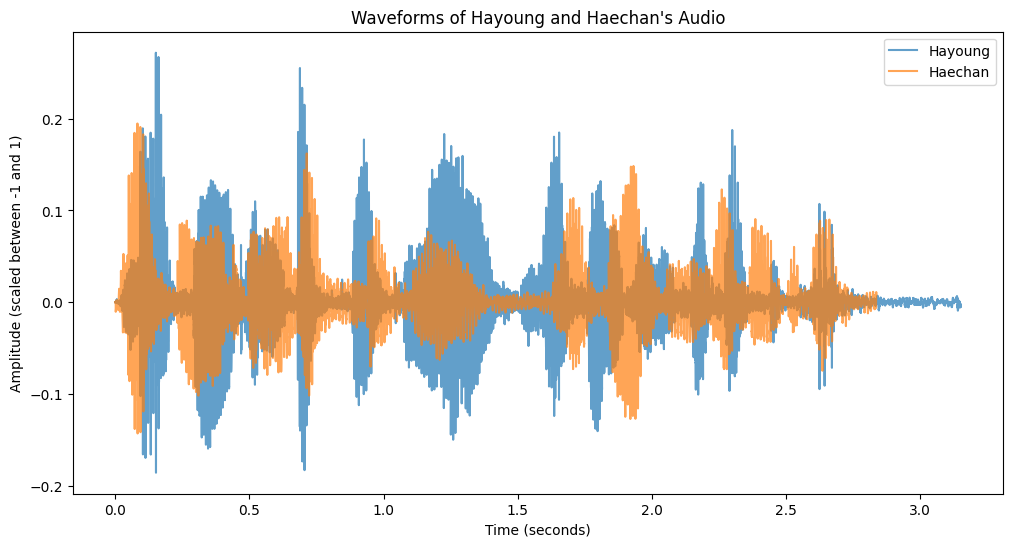

In [ ]:
# Create time axes for both waveforms
num_samples_hayoung = hayoung_wav.shape[0]
num_samples_haechan = haechan_wav.shape[0]
sample_rate = 16000  # 16kHz

# Time arrays for each waveform
time_axis_hayoung = np.linspace(0, num_samples_hayoung / sample_rate, num_samples_hayoung)
time_axis_haechan = np.linspace(0, num_samples_haechan / sample_rate, num_samples_haechan)

# Plot both waveforms on the same plot
plt.figure(figsize=(12, 6))
plt.plot(time_axis_hayoung, hayoung_wav, label="Hayoung", alpha=0.7)
plt.plot(time_axis_haechan, haechan_wav, label="Haechan", alpha=0.7)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (scaled between -1 and 1)")
plt.title("Waveforms of Hayoung and Haechan's Audio")
plt.legend(loc="upper right")

# Display the plot
plt.show()

The plot above displays the waveforms of audio samples from Hayoung and Haechan, plotted together for comparison. The x-axis represents time in seconds, while the y-axis shows the amplitude of the audio signals, scaled between -1 and 1. As the general pattern of both waveforms remains synchronized over time, we can find out that we can find out that both individuals read the same phrase. In many parts of the plot, the two waveforms overlap closely, indicating similarities in the pitch, tone, or volume of the voices. However, there are some instances where the amplitudes deviate, suggesting subtle differences in pronunciation, intonation, or emphasis. For instance, at certain peaks around the 1-second and 2.5-second marks, one voice exhibits a higher amplitude than the other, possibly indicating different speech dynamics or inflections.



### 3.3. Plot sample pitch contour

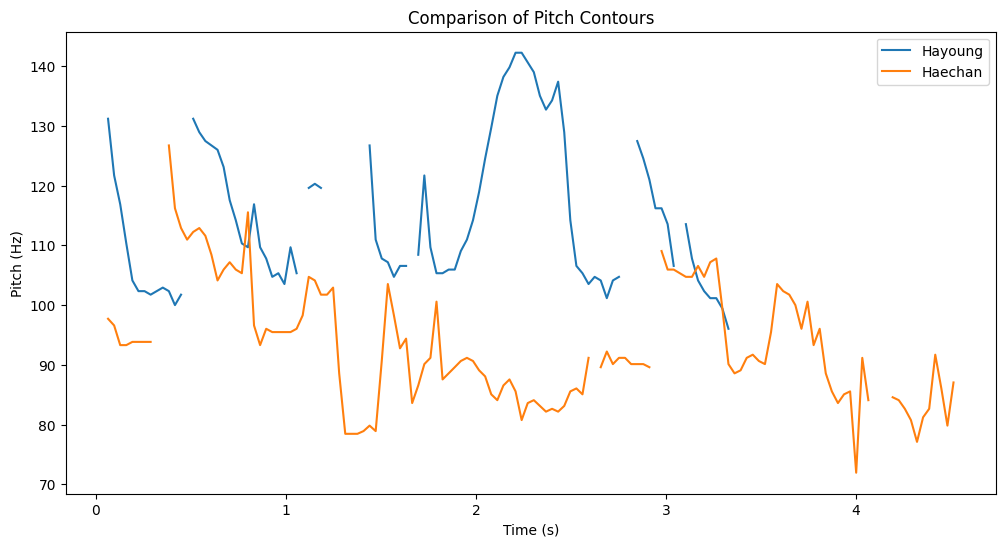

In [ ]:
def extract_pitch_contour(wav, sample_rate=16000):
    """Extract the pitch contour using the pyin algorithm."""
    pitches, voiced_flags, _ = librosa.pyin(
        wav.numpy(),
        fmin=50, fmax=300, sr=sample_rate,
        frame_length = int(0.04 * sample_rate),  # 40 ms = 640 samples
        hop_length = int(0.02 * sample_rate)  # 20 ms = 320 samples
    )
    # Convert frame indices to time
    times = librosa.frames_to_time(np.arange(len(pitches)), sr=sample_rate, hop_length=512)

    # Filter out unvoiced regions (set to NaN where voiced_flags is False)
    pitches[~voiced_flags] = np.nan
    return times, pitches

def plot_pitch_contours(times1, pitches1, times2, pitches2):
    """Plot two pitch contours with different colors."""
    plt.figure(figsize=(12, 6))
    plt.plot(times1, pitches1, label="Hayoung", color='tab:blue')
    plt.plot(times2, pitches2, label="Haechan", color='tab:orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.title("Comparison of Pitch Contours")
    plt.legend(loc='upper right')
    plt.show()

# Extract pitch contours using pyin
hayoung_times, hayoung_pitches = extract_pitch_contour(hayoung_wav)
haechan_times, haechan_pitches = extract_pitch_contour(haechan_wav)

# Plot the pitch contours
plot_pitch_contours(hayoung_times, hayoung_pitches, haechan_times, haechan_pitches)


The plot above visualizes the pitch contours for two audio samples. The x-axis shows time in seconds, while the y-axis displays the pitch in Hertz (Hz), representing the fundamental frequency of each voice over time. It is possible to notice that there are subtle pitch differences between the two voices, even though they may sound similar to the human ear. There are points where the two contours are quite close, indicating moments where the pitch patterns are similar. However, they diverge significantly at other points, especially between 2 to 3 seconds, suggesting the presence of individual characteristics in the voices. Hayoung’s pitch (blue line) fluctuates primarily between 100 Hz and 130 Hz, indicating a higher overall pitch range. In comparison, Haechan’s pitch (orange line) tends to stay between 80 Hz and 110 Hz, suggesting a slightly lower voice register.

### 3.4. Plot sample RMS

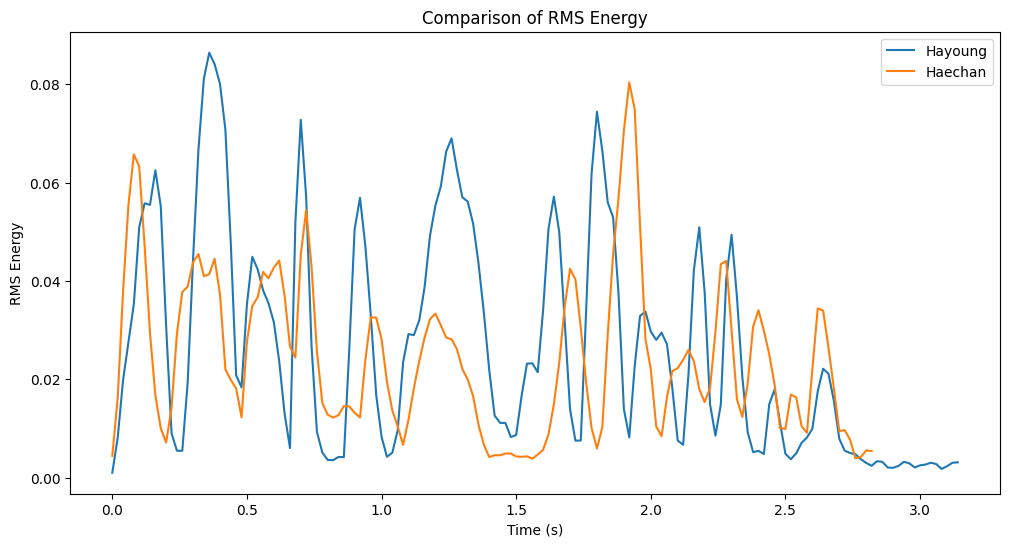

In [ ]:
def calculate_rms(wav, sr=16000, frame_length=640, hop_length=320):
    """Calculate RMS energy"""
    rms = librosa.feature.rms(y=wav.numpy(), frame_length=frame_length, hop_length=hop_length)[0]
    times = librosa.frames_to_time(np.arange(len(rms)), sr=sr, hop_length=hop_length)
    return times, rms

def plot_rms(times1, rms1, times2, rms2):
    """Plot RMS energy for two audio files."""
    plt.figure(figsize=(12, 6))
    plt.plot(times1, rms1, label="Hayoung", color='tab:blue')
    plt.plot(times2, rms2, label="Haechan", color='tab:orange')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.title("Comparison of RMS Energy")
    plt.legend(loc='upper right')
    plt.show()


# Calculate RMS energy
hayoung_times, hayoung_rms = calculate_rms(hayoung_wav)
haechan_times, haechan_rms = calculate_rms(haechan_wav)

# Plot the RMS energy for both speakers
plot_rms(hayoung_times, hayoung_rms, haechan_times, haechan_rms)

The plot above shows a comparison of the RMS (Root Mean Square) energy between the audio samples. RMS Energy reflects the energy or intensity of the audio signal over time. It is computed as the square root of the average of the squared values of the signal over a given time window. Peaks indicate moments where the voice is louder or more energetic, while valleys represent quieter or less energetic segments. At some points, both voices show overlapping energy patterns, suggesting similar intensity at those times.
However, there are also noticeable differences in the shapes of the curves, indicating distinct variations in speech dynamics.


### 3.5. Plot sample ZCR

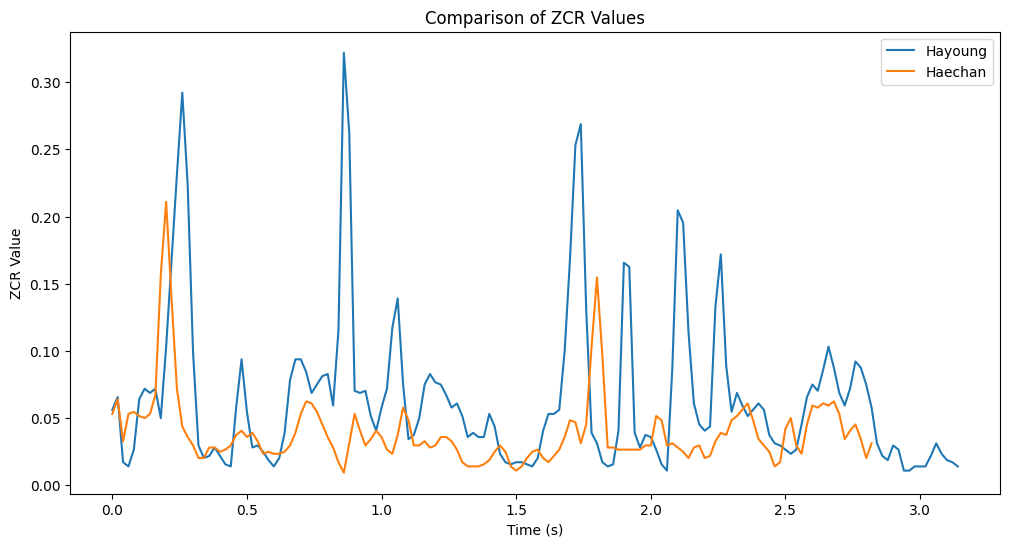

In [ ]:
def calculate_zcr(wav, sr=16000, frame_length=640, hop_length=320):
    """Calculate Zero-Crossing Rate (ZCR) for the waveform."""
    zcr = librosa.feature.zero_crossing_rate(y=wav.numpy(), frame_length=frame_length, hop_length=hop_length)[0]
    times = librosa.frames_to_time(np.arange(len(zcr)), sr=sr, hop_length=hop_length)
    return times, zcr

def plot_zcr(times1, rms1, times2, rms2):
    """Plot ZCR value for two audio files."""
    plt.figure(figsize=(12, 6))
    plt.plot(times1, rms1, label="Hayoung", color='tab:blue')
    plt.plot(times2, rms2, label="Haechan", color='tab:orange')
    plt.xlabel('Time (s)')
    plt.ylabel('ZCR Value')
    plt.title("Comparison of ZCR Values")
    plt.legend(loc='upper right')
    plt.show()


# Calculate RMS value
hayoung_times, hayoung_zcr = calculate_zcr(hayoung_wav)
haechan_times, haechan_zcr = calculate_zcr(haechan_wav)

# Plot the ZCR value for both speakers
plot_zcr(hayoung_times, hayoung_zcr, haechan_times, haechan_zcr)

The plot above compares the Zero-Crossing Rate (ZCR) values for the voices of Hayoung and Haechan over time. ZCR measures the rate at which the signal changes sign (crosses the zero value) within a time window. It’s often used to analyze the texture of an audio signal. A higher ZCR typically indicates that the signal contains more high-frequency content, such as fricatives or unvoiced consonants in speech, while a lower ZCR suggests more voiced or smoother sounds. In the plot, Hayoung’s voice has more frequent and higher peaks compared to Haechan’s, suggesting potentially higher variability or more high-frequency elements in some segments of the speech.


### 3.6. Summary of the plots

The four plots reveal distinct patterns between the two voices in terms of intensity, frequency, and signal variation over time. While there are noticeable overlaps, these patterns suggest potential for building effective models based on these characteristics. By incorporating these features appropriately, the models can leverage subtle differences that might be challenging for humans to detect, enhancing its ability to accurately distinguish between the two voices.

### 3.7. Identify potential bias by determining average length of each categories

In [ ]:
hayoung_dir = os.path.join('data', 'hayoung')
haechan_dir = os.path.join('data', 'haechan')

In [ ]:
# Initialize an empty list to store the lengths of audio files for Hayoung
hayoung_lengths = []
for file in os.listdir(hayoung_dir):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'hayoung', file))
    hayoung_lengths.append(len(tensor_wave))

In [ ]:
hayoung_mean = tf.math.reduce_mean(hayoung_lengths)
hayoung_min = tf.math.reduce_min(hayoung_lengths)
hayoung_max = tf.math.reduce_max(hayoung_lengths)

mean_value = hayoung_mean.numpy()
min_value = hayoung_min.numpy()
max_value = hayoung_max.numpy()

# Define the sampling rate (in Hz)
sampling_rate = 16000  # 16 kHz

# Convert samples to seconds
mean_seconds = mean_value / sampling_rate
min_seconds = min_value / sampling_rate
max_seconds = max_value / sampling_rate

# Display the results in a readable format
output = f"""
Audio Length Analysis for Hayoung's Samples:
--------------------------------------------
- Mean Length: {mean_value} samples ({mean_seconds:.2f} seconds)
- Minimum Length: {min_value} samples ({min_seconds:.2f} seconds)
- Maximum Length: {max_value} samples ({max_seconds:.2f} seconds)
"""
print(output)



Audio Length Analysis for Hayoung's Samples:
--------------------------------------------
- Mean Length: 72616 samples (4.54 seconds)
- Minimum Length: 40597 samples (2.54 seconds)
- Maximum Length: 173376 samples (10.84 seconds)



In [ ]:
# Initialize an empty list to store the lengths of audio files for Haechan
haechan_lengths = []
for file in os.listdir(haechan_dir):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'haechan', file))
    haechan_lengths.append(len(tensor_wave))

In [ ]:
haechan_mean = tf.math.reduce_mean(haechan_lengths)
haechan_min = tf.math.reduce_min(haechan_lengths)
haechan_max = tf.math.reduce_max(haechan_lengths)

mean_value = haechan_mean.numpy()
min_value = haechan_min.numpy()
max_value = haechan_max.numpy()

# Define the sampling rate (in Hz)
sampling_rate = 16000  # 16 kHz

# Convert samples to seconds
mean_seconds = mean_value / sampling_rate
min_seconds = min_value / sampling_rate
max_seconds = max_value / sampling_rate

# Display the results in a readable format
output = f"""
Audio Length Analysis for Haechan's Samples:
--------------------------------------------
- Mean Length: {mean_value} samples ({mean_seconds:.2f} seconds)
- Minimum Length: {min_value} samples ({min_seconds:.2f} seconds)
- Maximum Length: {max_value} samples ({max_seconds:.2f} seconds)
"""
print(output)


Audio Length Analysis for Haechan's Samples:
--------------------------------------------
- Mean Length: 70528 samples (4.41 seconds)
- Minimum Length: 37525 samples (2.35 seconds)
- Maximum Length: 150848 samples (9.43 seconds)



There is clear difference in audio lengths between the two categories (Hayoung's and Haechan's samples). This could introduce several types of biases that may affect the performance of machine learning models.
- Since the mean and maximum lengths of Hayoung's samples are longer, the model might implicitly learn to associate longer audio samples with Hayoung. This can result in biased predictions where the model becomes more likely to classify longer inputs as Hayoung, even when they belong to Haechan.
- Features like RMS energy, ZCR, spectral centroid, and spectral bandwidth are affected by the duration of the audio. With longer samples, the aggregated feature values (e.g., mean or variance) may differ between the two categories simply due to the sample length, rather than intrinsic voice characteristics.
- One possible mitigation strategy is to truncate or pad all audio samples to a consistent length to ensure uniform input size. However, since I want the models to perform well regardless of varying input lengths, I opted instead to normalize feature calculations (e.g., computing the mean and standard deviation within each sample) to minimize bias arising from differences in duration.


### 3.8. Extract accoustic parameters



In [ ]:
def extract_acoustic_params(file_path):
    """
    Extract accoustic parameters from the given audio file
    """
    # Load the audio file as a 16kHz mono waveform
    wav = load_wav_16k_mono(file_path)

    # Set frame length and hop length for feature extraction
    frame_length = 640
    hop_length = 320

    # Extract RMS (Root Mean Square) energy and compute its mean and standard deviation
    rms = librosa.feature.rms(y=wav.numpy(), frame_length=frame_length, hop_length=hop_length)[0]
    rms_mean = np.mean(rms)
    rms_sd = np.std(rms)

    # Extract Zero-Crossing Rate (ZCR) and compute its mean and standard deviation
    zcr = librosa.feature.zero_crossing_rate(y=wav.numpy(), frame_length=frame_length, hop_length=hop_length)[0]
    zcr_mean = np.mean(zcr)
    zcr_sd = np.std(zcr)

    # Extract Spectral Centroid and compute its mean and standard deviation
    spectral_centroid = librosa.feature.spectral_centroid(y=wav.numpy(), sr=16000, n_fft=512, hop_length=hop_length)[0]
    frequency_mean = np.mean(spectral_centroid)
    frequency_sd = np.std(spectral_centroid)

    # Extract Spectral Bandwidth and compute its mean and standard deviation
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=wav.numpy(), sr=16000, n_fft=512, hop_length=hop_length)
    bandwidth_mean = np.mean(spectral_bandwidth)
    bandwidth_sd = np.std(spectral_bandwidth)

    # Combine all extracted features into a single numpy array for output
    output = np.array([rms_mean, rms_sd, zcr_mean, zcr_sd, frequency_mean, frequency_sd, bandwidth_mean, bandwidth_sd])

    # Return the extracted acoustic parameters as an array
    return output

## 4. Task Description & Data Split

As briefly discussed in section 1, this project aims to investigate whether machine learning can effectively distinguish between the voices of two individuals who are frequently confused for one another in online settings. Using a dataset of recorded audio samples, the analysis will focus on extracting key acoustic features to identify distinguishing characteristics between the two voices. By applying classification techniques, different models will learn from these features to predict which voice belongs to each person. Additionally, for CNN and CRNN models, the audios will be converted into a spectrogram, a visual representation of how the frequency content of a sound changes over time. The success of these approaches will be evaluated using various performance metrics, providing insights into whether the voices are genuinely similar or if the confusion arises from listeners’ perception.

### 4.1. Define a function extracting accoustic parameters from each directory


In [ ]:
def process_feature_vectors(directory, label):
    """
    Extract features from all audio files in a directory and return them with labels and paths.
    """
    features = []
    labels = []
    paths = []

    for filename in os.listdir(directory):
        try:
            file_path = os.path.join(directory, filename)
            feature_vector = extract_acoustic_params(file_path)
            features.append(feature_vector)
            labels.append(label)  # 1 for Hayoung, 0 for Haechan
            paths.append(file_path)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    return features, labels, paths

### 4.2. Perform necessary data split after extracting features

In [ ]:
def prepare_data():
    """
    Extract features from both Hayoung and Haechan directories, label them, and split the data.
    """
    # Extract features and labels from both directories
    hayoung_features, hayoung_labels, hayoung_paths = process_feature_vectors(os.path.join('data', 'hayoung'), 1)
    haechan_features, haechan_labels, haechan_paths = process_feature_vectors(os.path.join('data', 'haechan'), 0)

    # Combine data
    X = np.vstack([hayoung_features, haechan_features])
    y = np.array(hayoung_labels + haechan_labels)
    paths = hayoung_paths + haechan_paths

    # Train-test split (60-40 split)
    X_train, X_test, y_train, y_test, train_paths, test_paths = train_test_split(
        X, y, paths, test_size=0.4, random_state=42, stratify=y
    )

    # Save paths for potential debugging or traceability
    train_df = pd.DataFrame({"file_path": train_paths, "label": y_train})
    test_df = pd.DataFrame({"file_path": test_paths, "label": y_test})

    hayoung_train_count = train_df['label'].value_counts()[1]
    haechan_train_count = train_df['label'].value_counts()[0]
    hayoung_test_count = test_df['label'].value_counts()[1]
    haechan_test_count = test_df['label'].value_counts()[0]

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    print(f"Training set - Hayoung: {hayoung_train_count}, Haechan: {haechan_train_count}")
    print(f"Test set - Hayoung: {hayoung_test_count}, Haechan: {haechan_test_count}")

    return X_train, X_test, y_train, y_test

# Run the data preparation function
X_train, X_test, y_train, y_test = prepare_data()

Training data shape: (144, 8)
Test data shape: (96, 8)
Training set - Hayoung: 72, Haechan: 72
Test set - Hayoung: 48, Haechan: 48


### 4.3. Plot sample Mel sepctrograms

In order to use CNN's convolutional layers to extract features, we first need to create a visual representation of each audio file. The primary reason why I chose Mel spectrogram is because the mel scale mimics the non-linear frequency perception of the human auditory system. The mel scale provides higher resolution at lower frequencies and lower resolution at higher frequencies, reflecting how humans are more sensitive to variations in lower frequencies. Mel spectrogram also reduces the dimensionality by applying a bank of mel filters, each corresponding to a perceptually meaningful band of frequencies. This process makes patterns like harmonic structures and formants more visually distinct and well-suited for CNNs or other machine learning models. The reduced size also enables a more effective computation. The following is a sample Mel spectrogram from each Hayoung and Haechan. We can observe that there is a clear difference in the visual representation.

In [ ]:
def plot_mel_spectrogram(*wav_tensors, titles=None):
    # Determine the number of spectrograms
    n_spectrograms = len(wav_tensors)

    # Create a figure with vertical subplots
    plt.figure(figsize=(10, 4 * n_spectrograms))

    # Default titles if not provided
    if titles is None:
        titles = [f'Mel-frequency spectrogram {i+1}' for i in range(n_spectrograms)]

    # Plot each spectrogram
    for i, wav_tensor in enumerate(wav_tensors):
        # Convert TensorFlow tensor to NumPy array
        y = wav_tensor.numpy()

        # Compute the mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=16000, n_fft=640, hop_length=320)

        # Convert to log scale (dB)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # Create subplot
        plt.subplot(n_spectrograms, 1, i+1)
        librosa.display.specshow(S_dB, sr=16000, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(titles[i])

    plt.tight_layout()


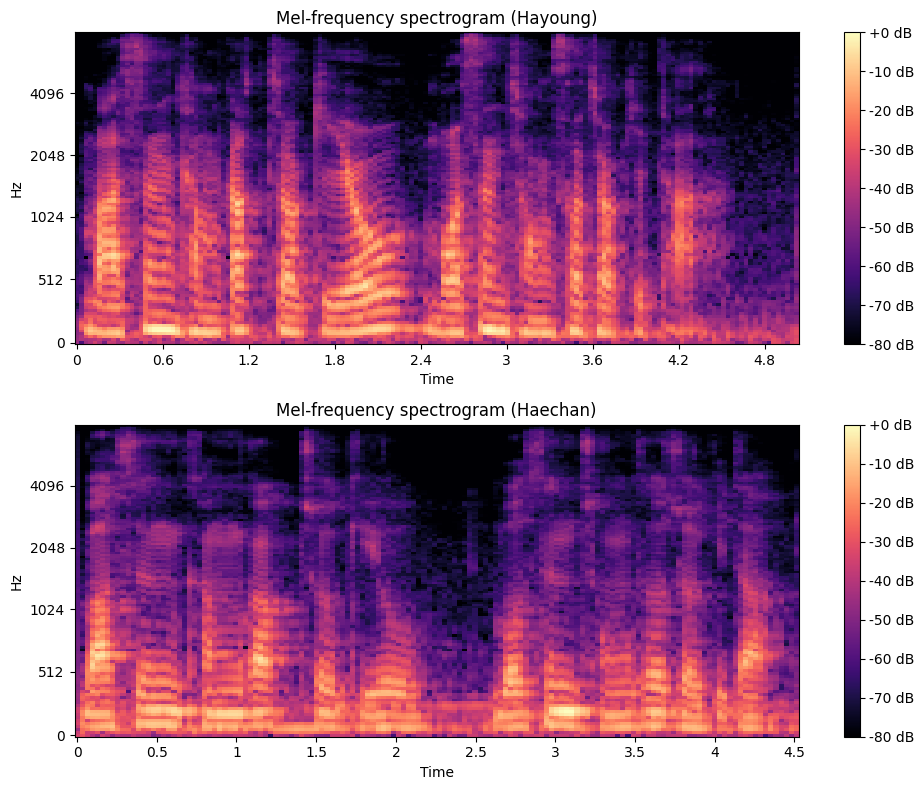

In [ ]:
plot_mel_spectrogram(hayoung_wav, haechan_wav,
                    titles=['Mel-frequency spectrogram (Hayoung)',
                            'Mel-frequency spectrogram (Haechan)'])

### 4.4. Convert audio files to Mel spectrograms

Creating a Mel spectrogram from an audio file involves several signal processing steps that transform the raw audio signal into a time-frequency representation on the Mel scale.

- Framing and Windowing: The first step after loading the audio is to break the continuous audio signal into smaller chunks of time called frames. This is necessary because sound changes over time, and analyzing small parts allows us to capture those changes. For this analysis, I chose a specific duration of 640 samples. Then we apply a window function to each frame to reduce spectral leakage due to discontinuities at the frame edges. In librosa library, the defaul window function is set to Hann.

- Short-Time Fourier Transform (STFT): The STFT transforms the audio from the time domain, which shows changes in amplitude over time, to the frequency domain, which shows how much of each frequency is present at a given time. This step produces a spectrogram, which is a 2D array where one axis represents time (the frames) and the other axis represents frequency. Each value in this array indicates the intensity or amplitude of a specific frequency at a specific time.

- Mel Scale & Mel Filter Bank: After creating the spectrogram, the frequencies need to be mapped to the mel scale to better reflect how humans perceive sound. This transformation is done by applying a series of mel filter banks, which are like mathematical sieves that group raw frequencies into mel frequency bands. The result is a mel spectrogram, a version of the original spectrogram that represents sound in a way that aligns more closely with human auditory perception. Mel scale formula is defined as below where f is the frequency in Hertz and m corresponds to the Mel scale value.

$$
m = 2595 \cdot \log_{10}\left(1 + \frac{f}{700}\right)
$$

- Coverting to Decibels: To make the mel spectrogram easier to interpret, the intensity values can be converted into decibels. This is because humans perceive loudness logarithmically, meaning small changes in loudness at lower levels are more noticeable than the same changes at higher levels. By taking the logarithm of the mel spectrogram values, we create a visual representation where variations in intensity are more aligned with how we hear them.

- Visualization: The final step is to create a heatmap-like image where time is on the horizontal axis, mel frequencies are on the vertical axis, and color intensity represents loudness.

Fortunately, most of these steps could be done by a single function in librosa, `librosa.feature.melspectrogram()`.

In [ ]:
def convert_wav_to_mel_spectrogram(input_directory, output_directory):

    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate over all files in the input directory
    for filename in os.listdir(input_directory):
        if filename.lower().endswith('.wav'):
            # Construct the full file path
            input_file_path = os.path.join(input_directory, filename)
            # Load the audio file
            audio, sr = librosa.load(input_file_path)
            # Compute the mel spectrogram
            S = librosa.feature.melspectrogram(y=audio, sr=16000, n_fft=640, hop_length=320)
            # Convert to log scale (dB)
            S_dB = librosa.power_to_db(S, ref=np.max)
            # Plot the spectrogram without decorations
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None)
            plt.axis('off')  # Turn off axis labels and ticks
            plt.tight_layout(pad=0)
            # Save the spectrogram as a PNG image
            output_file_name = os.path.splitext(filename)[0] + '.png'
            output_file_path = os.path.join(output_directory, output_file_name)
            plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
            plt.close()

In [ ]:
# convert_wav_to_mel_spectrogram(hayoung_dir, os.path.join('data', 'images, 'hayoung'))
# convert_wav_to_mel_spectrogram(haechan_dir, os.path.join('data', 'images', 'haechan'))

### 4.5. Perform necessary data split for spectrograms

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

# Get all file paths and labels
base_dir = 'data/images'
classes = os.listdir(base_dir)

filepaths = []
labels = []

for label, class_dir in enumerate(classes):
    class_path = os.path.join(base_dir, class_dir)
    for img_file in os.listdir(class_path):
        filepaths.append(os.path.join(class_path, img_file))
        labels.append(label)

# Split into train and test sets
train_files, test_files, train_labels, test_labels = train_test_split(filepaths, labels, test_size=0.3, stratify=labels, random_state=18)

# Save paths for potential debugging or traceability
train_df = pd.DataFrame({"file_path": train_files, "label": train_labels})
test_df = pd.DataFrame({"file_path": test_files, "label": test_labels})

hayoung_train_count = train_df['label'].value_counts()[1]
haechan_train_count = train_df['label'].value_counts()[0]
hayoung_test_count = test_df['label'].value_counts()[1]
haechan_test_count = test_df['label'].value_counts()[0]

print(f"Training set - Hayoung: {hayoung_train_count}, Haechan: {haechan_train_count}")
print(f"Test set - Hayoung: {hayoung_test_count}, Haechan: {haechan_test_count}")


# Function to load and preprocess images
def load_and_preprocess_image(filepath):
    img = load_img(filepath, target_size=(128, 256))
    return img_to_array(img) / 255.0

# Load train and test datasets
X_train_img = np.array([load_and_preprocess_image(fp) for fp in train_files])
X_test_img = np.array([load_and_preprocess_image(fp) for fp in test_files])

# Convert labels to numpy arrays
y_train_img = np.array(train_labels)
y_test_img = np.array(test_labels)


X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(
    X_train_img, y_train_img, test_size=0.2, stratify=y_train_img, random_state=18
)

# Print the number of images for each class in the validation set
hayoung_val_count = np.sum(y_val_img == 1)
haechan_val_count = np.sum(y_val_img == 0)

print(f"Validation set - Hayoung: {hayoung_val_count}, Haechan: {haechan_val_count}")

Training set - Hayoung: 84, Haechan: 84
Test set - Hayoung: 36, Haechan: 36
Validation set - Hayoung: 17, Haechan: 17


## 5. Model Selection

In this anaylsis, I'm mainly exploring two models.

- Decision Tree: A non-linear model that segments the data based on feature values. It will build a series of conditions based on the extracted audio features, classifying the voices of Hayoung and Haechan. Decision trees are intuitive but may risk overfitting with small datasets.

- Logistic Regression: A linear model for binary classification (in this case, Hayoung vs. Haechan). It assumes a linear relationship between the input features and the probability of a class. Logistic regression provides probabilities and is useful for interpreting the weight of each feature.

- Convolutional Neural Network (CNN): A type of deep learning model designed to process data with a grid-like structure, such as images or spectrograms. CNN is trained with labeled spectrograms from both speakers, trying to identify voice-specific characteristics such as pitch, tone, and frequency distribution. Once trained, the CNN can classify new spectrograms, assigning probabilities to each class (Hayoung or Haechan) and making a prediction based on the highest probability.

- CRNN (Convolutional Recurrent Neural Network): A special type of deep learning model that combines convolutional layers with recurrent layers to handle both spatial and temporal patterns in data. The convolutional layers in the CRNN extract spatial features, and these features are passed to recurrent layers, which capture the sequential dependencies in the voice data. The combined spatial and temporal analysis allows the CRNN to learn voice-specific characteristics unique to each speaker.

### 5.1. Pseudocode for Decision Tree


**1. Initialize tree**
- Takes two inputs `max_depth` and `criterion`, store them, and initialize the tree as None.

**2. Fit the tree**
- X: Feature matrix (shape: m×n).
- y: Labels/target vector (shape: m×1).
- Build the decision tree recursively starting from the root by calling `_build_tree(X, y, depth=0)`.

**3. Build the tree**
- If all labels in y are the same (pure node) or the depth exceeds the max_depth (if specified), return a leaf node with the label set as the rounded mean of y.
- Find the best feature and threshold to split the data using `_find_best_split(X, y)`.
- Split the data into left and right branches using the best feature and threshold.
- Recursively build the left and right branches by calling `_build_tree` on the subsets of X and y.
- Return a dictionary representing the node, which includes - axis: The feature used for splitting, threshold: The value at which the split occurs,
 left: The left subtree, right: The right subtree.


**4. Find the best split**
- For each feature *i* (total 8 features are extracted above), identify unique values.
- For each unique value *t* in the feature, calculate the impurity of splitting X and y at the feature with the value utilizing `calculate_impurity`.
- Track the best split (feature and threshold) that results in the lowest impurity.
- Return the best feature and threshold for the split.


**5. Calculate impurity or entropy**
- When `calculate_impurity` is called, it directly calls `calculate_weighted_impurity function`. This function calculates the impurity of the left branch using `calculate_leaf_impurity(left_y)` and the impurity of the right branch using `calculate_leaf_impurity(right_y)`, and compute the weighted sum of impurities based on the size of each branch. We calculate weighted impurities to account for the fact that when a node is split into two branches, each branch may contain a different number of samples. By weighting the impurities of the left and right branches according to the number of samples in each, we ensure that larger branches have a proportionate impact on the overall impurity.

$$\text{Weighted Impurity} = \frac{|left\_y|}{|total\_y|} \cdot \text{left impurity} + \frac{|right\_y|}{|total\_y|} \cdot \text{right impurity}$$

- When the `criterion` is `gini`, `calculate_leaf_impurity` calculates gini impurity.

$$\text{Gini impurity} = 1 - \sum_{i=1}^{k} p_i^2$$

- For this analysis, where there are only two classes, k=2, the formula simplifies to the following notaion. p0 is the proportion of class 0 and p1 is the proportion of class 1 in the leaf.

$$\text{Gini impurity} = 1 - \left(p_0^2 + p_1^2\right)$$

- When the `criterion` is `entropy`, `calculate_leaf_impurity` calculates entropy.

$$\text{Entropy} = - \sum_{i=0}^{1} p_i \log_2(p_i)$$

- For this analysis, where there are only two classes, k=2, the formula simplifies to the following notaion. p0 is the proportion of class 0 and p1 is the proportion of class 1 in the leaf.

$$\text{Entropy} = - \left(p_0 \log_2(p_0) + p_1 \log_2(p_1)\right)$$

**6. Predict**

- `predict` takes feature matrix of the test dataset as an input. Then it traverse the tree by calling `_predict_single` until a leaf node is reached. In `_predict_single`, if x[axis] is less than or equal to the threshold stored in the leaf, it moves to the left subtree. Otherwise, it moves to the right subtree. If the current node is a leaf, it returns the label of the leaf.

### 5.2. Decision Tree Implementation

In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth, criterion):
        """
        Initialize the Decision Tree with maximum depth and splitting criterion.
        Parameters:
        - max_depth: the maximum depth the tree can grow (None for no limit).
        - criterion: the criterion for calculating impurity ('gini' or 'entropy').
        """
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        """
        Fit the decision tree model to the training data.
        Parameters:
        - X: feature matrix of the training data.
        - y: labels for the training data.
        """
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.
        - Stop if all labels are the same or if the maximum depth is reached.
        - Find the best feature and threshold to split the data.
        - Create left and right branches and continue to grow the tree.
        """
        if len(set(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {"label": np.round(np.mean(y))}  # Return leaf node with majority class

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return {"label": np.round(np.mean(y))}  # No valid split, return a leaf

        axis, threshold = best_split
        left_mask = X[:, axis] <= threshold
        right_mask = X[:, axis] > threshold

        left_branch = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_branch = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {"axis": axis, "threshold": threshold, "left": left_branch, "right": right_branch}

    def _find_best_split(self, X, y):
        """
        Find the best feature and threshold to split the dataset.
        - Iterate over all features and potential thresholds.
        - Return the split that results in the lowest impurity.
        """
        best_impurity = float("inf")  # Start with infinite impurity
        best_split = None

        for axis in range(X.shape[1]):  # Loop through each feature
            thresholds = np.unique(X[:, axis])  # Unique values for splitting
            for threshold in thresholds:
                impurity = self.calculate_impurity(X, y, axis, threshold)
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_split = (axis, threshold)  # Store best feature and threshold
        return best_split

    def calculate_impurity(self, x_data, y_data, axis, threshold):
        """
        Calculate the impurity for a given feature and threshold split.
        - Split data into left and right based on the threshold.
        - Calculate the weighted impurity for the split.
        """
        left_mask = x_data[:, axis] <= threshold
        right_mask = x_data[:, axis] > threshold
        return self.calculate_weighted_impurity(y_data[left_mask], y_data[right_mask])

    def calculate_weighted_impurity(self, left_ys, right_ys):
        """
        Calculate the weighted impurity for the left and right branches.
        - Calculate the impurity for the left and right subsets.
        - Weight them according to the size of each subset.
        """
        total = len(left_ys) + len(right_ys)
        left_impurity = self.calculate_leaf_impurity(left_ys) * len(left_ys) / total
        right_impurity = self.calculate_leaf_impurity(right_ys) * len(right_ys) / total
        return left_impurity + right_impurity

    def calculate_leaf_impurity(self, leaf_ys):
        """
        Calculate the impurity of a leaf node.
        - Use Gini or Entropy criterion to measure impurity.
        """
        if len(leaf_ys) == 0:
            return 0
        p1 = sum(leaf_ys == 1) / len(leaf_ys)
        p0 = sum(leaf_ys == 0) / len(leaf_ys)
        if self.criterion == 'gini':
            return 1 - p0**2 - p1**2  # Gini impurity formula
        elif self.criterion == 'entropy':
            if p1 == 0 or p0 == 0:
                return 0  # No impurity if all values are the same
            return -p1 * np.log2(p1) - p0 * np.log2(p0)  # Entropy formula

    def predict(self, X):
        """
        Predict the class labels for the input feature matrix X.
        - Traverse the tree to make predictions for each sample.
        """
        predictions = [self._predict_single(x, self.tree) for x in X]
        return np.array(predictions)

    def _predict_single(self, x, node):
        """
        Recursively traverse the decision tree to make a prediction for a single sample.
        - If the node is a leaf, return the label.
        - Otherwise, follow the left or right branch depending on the feature value.
        """
        if "label" in node:
            return node["label"]  # Return leaf label (prediction)
        if x[node["axis"]] <= node["threshold"]:
            return self._predict_single(x, node["left"])  # Traverse left branch
        else:
            return self._predict_single(x, node["right"])  # Traverse right branch


### 5.3. Pseudocode for Logistic Regression


**1. Initialize tree**
- Takes two inputs `learning_rate` and `n_iterations`, store them, and initialize `weights` and `bias` as None.

**2. Define sigmoid helper fuction**
- This function takes value `z` as input and clip it to prevent overflow (extremely large or small numbers). Then the sigmoid formula is applied to `z`, to convert it into a value between 0 and 1. The notation is as following:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**3. Train the model**
- Get the number of samples (rows) and features (columns) from the input data X. It initializes weights to a zero vector of the same size as the number of features, and initializes bias to 0.
- For each iteration, the first operation would be calculating the dot product between the weights vector and the input vector, and adding bias.

$$
Z = \begin{pmatrix} W^1 \\
W^2 \\
W^3 \\
W^4 \\
W^5 \\
W^6 \\
W^7 \\
W^8
\end{pmatrix}
\left(
\begin{pmatrix}
f_1^1 & f_1^2 & f_1^3 & f_1^4 & f_1^5 & f_1^6 & f_1^7 & f_1^8
\end{pmatrix}
\right) + b
$$

- Then we pass the value to `_sigmoid` function to map it between 0 and 1 and clip it.
$$ \hat{y} = \frac{1}{1 + e^{-z}}$$

- Now that we have actual predictions, we can write our loss function to measure how well our predictions are. This is done with the binary cross entropy. For every 100 iteration, we print the loss to see if the model is performing better.

$$
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- Next is the backwards pass. For this, We would need to differentiate the Loss function with weights and bias. The exact formula are provided below.

$$
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} ( \hat{y}_i - y_i ) \cdot X_i
$$

$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} ( \hat{y}_i - y_i )
$$

- Next we need to update the weights and bias by multiplying the gradients with learning rate and subtracting them from current values. Learning rate will set the speed in which we try to converge to the minimum loss.

- We repeat this whole process for the number of `n_iterations`.


**4. Predict**
- The `predict` function takes the input X and calculate the dot product between the current weights vector and the input vector, add current bias. Then we pass the value to `_sigmoid` function to map it between 0 and 1. If the output is greater or equal to 0.5, we classify it to 1. Otherwise, we classify it to 0.


### 5.4. Logistic Regression Implementation

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, n_iterations):
        """
        Initialize the Logistic Regression model with learning rate and number of iterations.
        Parameters:
        - learning_rate: the step size used in gradient descent.
        - n_iterations: the number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        """
        Sigmoid activation function.
        - It maps any real value into a range between 0 and 1.
        - The np.clip function prevents overflow issues by limiting z values.
        """
        z = np.clip(z, -500, 500)  # Avoid overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the Logistic Regression model using gradient descent.
        - Initialize weights and bias to zeros.
        - Compute the linear combination of inputs (X * weights + bias).
        - Apply the sigmoid activation to get predictions.
        - Calculate the gradients and update the weights and bias.
        """
        n_samples, n_features = X.shape  # Number of samples and features

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iterations):
            # Linear model: Z = X * weights + bias
            Z = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function to get predicted probabilities
            y_predicted = self._sigmoid(Z)

            # Clip predicted values to avoid log(0) issues in loss computation
            y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)

            # Log loss calculation (for informational purposes, every 100 iterations)
            if i % 100 == 0:
                loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
                print(f"Iteration {i}, Loss: {loss:.4f}")

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Gradient of weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Gradient of bias

            # Update weights and bias with gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict class labels (0 or 1) for input features X.
        - Use the sigmoid activation function and a threshold of 0.5.
        """
        Z = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(Z)
        return np.where(y_predicted >= 0.5, 1, 0)  # Return 1 if >= 0.5, else 0

    def predict_proba(self, X):
        """
        Predict class probabilities for input features X.
        - The result is the probability of each sample belonging to class 1.
        """
        Z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(Z)  # Return probabilities in the range [0, 1]


### 5.5. Pseudocode for CNN (New)

**1. Input Layer (16 filters, 3x3 kernel size, ReLU activation, input_shape=(128, 256, 3))**
- The first convolutional layer applies 16 filters (each of size 3x3 pixels), to the input images. The input shape (128, 256, 3) indicates that the model expects images with a height of 128 pixels, a width of 256 pixels, and 3 color channels (RGB).

- The convolution operation scans these filters across the image to detect local patterns such as edges, textures, and simple shapes by computing dot products between the filters and local regions of the input.

- The ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity, converting negative values to zero while keeping positive values unchanged. This helps the network learn complex patterns by stacking multiple layers.


**2. MaxPooling2D Layer (pool size of 2x2)**
- This pooling layer reduces the spatial dimensions (height and width) of the feature maps by sliding a 2x2 window over the input and keeping only the maximum value within each window.

- Max pooling helps to make the representation more manageable by decreasing the number of parameters and computations in the network, which can improve training speed and reduce overfitting. The exact formula that represents the output value at position (p,q) in the i-th output feature map (activation map) after applying a convolution operation followed by a max-pooling operation is as follows:

$$
P_i(p, q) = \max_{(m, n) \in \Omega_{pq}} \hat{F}_i(m, n)
$$


**3. Second Conv2D Layer (32 filters, 3x3 kernel size, ReLU activation):**
- This second pooling layer further reduces the spatial dimensions of the feature maps, effectively summarizing the presence of features in larger regions of the image. By applying another 2x2 max pooling, the model abstracts the features to a higher level, making it more robust to variations in the input.


**4. 2nd MaxPooling2D Layer (pool size of 2x2)**
- This second pooling layer further reduces the spatial dimensions of the feature maps, effectively summarizing the presence of features in larger regions of the image. By applying another 2x2 max pooling, the model abstracts the features to a higher level, making it more robust to variations in the input.


**5. Flatten Layer:**
- The flatten layer transforms the multidimensional output of the previous layer into a one-dimensional vector. This conversion is necessary because the subsequent dense (fully connected) layers expect input in a one-dimensional format. This conversion is necessary because the subsequent dense (fully connected) layers expect input in a one-dimensional format. Flattening combines all the learned features into a single vector that represents the presence and strength of various features throughout the image.


**6. Dense Layer:**
- This fully connected layer consists of 64 neurons, each receiving input from all nodes in the flattened vector. It processes the combined features to learn higher-level representations and patterns that are important for classification. The ReLU activation function introduces non-linearity, allowing the layer to capture complex relationships between features. In the formula below, N is the length of the flattened vector v, w​ are weights, and b are biases.

$$
h_k = \text{ReLU}\left( \sum_{l=1}^N w_{kl} v_l + b_k \right), \quad k = 1, 2, \dots, 64
$$


**7. Dropout layer:**
- The dropout layer randomly sets 50% of its input units to zero during each training step, which helps prevent overfitting. By dropping out neurons, the network becomes less sensitive to the specific weights of individual neurons, forcing it to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.


**8. Dense Layer (1 unit, Sigmoid activation):**

- This final layer has a single neuron that produces a scalar output representing the probability that the input image belongs to a particular class. The sigmoid activation function squashes the output to a range between 0 and 1, making it suitable for binary classification tasks.

$$
y = \frac{1}{1 + e^{-\left(\mathbf{w}^\top \mathbf{h} + b\right)}}
$$

### 5.6. CNN Implementation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

learning_rate = 0.00001
adam_optimizer = Adam(learning_rate=learning_rate)

cnn_model = Sequential([
    # First Convolutional Block
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 256, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5.7. Pseudocode for CRNN

**1-4. Identical to the CNN model above**


**5. Reshape Layer**
- The data output from the convolutional and pooling layers is a multi-dimensional tensor representing spatial hierarchies of features. The reshape layer transforms this tensor into a 2D tensor suitable for the recurrent layer by reorganizing it into 32 time steps (sequences). Each time step now contains a flattened vector of features, aligning the data structure required for processing by the GRU layer. -1 in Reshape() is a dynamic sizing feature in NumPy and TensorFlow that allows the dimension to be automatically inferred.


**6. GRU Layer**
- The Gated Recurrent Unit (GRU) layer with 64 units processes the sequential data from the reshape layer. GRUs are a type of recurrent neural network that can capture temporal dependencies and sequence patterns in data. The 'tanh' activation function is used within the GRU units to keep the output values between -1 and 1, aiding in the stabilization of learning and handling of gradients.
- Reset gate:
$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$

- Update Gate:

$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$

- Candidate Activation:
$$
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
$$

- Hidden State Update:
$$
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
$$

$$
\begin{aligned}
&\bullet \ x_t \text{ is the input at time } t. \\
&\bullet \ h_{t-1} \text{ is the previous hidden state.} \\
&\bullet \ \sigma \text{ denotes the sigmoid activation function.} \\
&\bullet \ \tanh \text{ is the hyperbolic tangent activation function.} \\
&\bullet \ \odot \text{ represents element-wise multiplication.} \\
&\bullet \ W_\ast \text{ and } U_\ast \text{ are weight matrices; } b_\ast \text{ are bias vectors.}
\end{aligned}
$$


**7. First Dense Layer**
- This fully connected layer consists of 64 neurons and uses the ReLU activation function. It takes the output from the GRU layer and learns higher-level representations by combining the features in various ways. The ReLU activation introduces non-linearity, enabling the layer to model complex relationships and interactions between features.

**8. Dropout Layer**
- To mitigate overfitting, a dropout layer with a rate of 0.4 is applied after the dense layer. During each training iteration, this layer randomly sets 40% of its input neurons to zero, forcing the network to not rely on any single neuron. This regularization technique promotes redundancy and robustness in the learned features, improving the model's generalization to unseen data.

**9. Output Layer**
- The final layer is a dense layer with a single neuron and uses the sigmoid activation function. This layer outputs a value between 0 and 1, representing the probability that the input belongs to a particular class in a binary classification task. The sigmoid function transforms the linear combination of inputs into a probabilistic score, making it suitable for predicting binary outcomes.

### 5.8. CRNN Implementation

In [ ]:
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, Reshape,
    LSTM, BatchNormalization, GRU
)

learning_rate = 0.0002
adam_optimizer = Adam(learning_rate=learning_rate)

crnn_model = Sequential([
    # First Convolutional Block
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 256, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(3,3)),
    MaxPooling2D((2, 2)),

    # Reshape for Recurrent Layer
    # Assuming the output shape from Conv layers is (height, width, channels)
    # We need to reshape it to (timesteps, features) for the GRU layers
    Reshape((32, -1)),

    # Recurrent Layer (GRU)
    GRU(64, return_sequences=False, activation="tanh"),

    # Fully Connected Layers
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

crnn_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## 6. Model Training

### 6.1. Conduct Hyperparameter tuning for Decision Tree

For decision tree model, I'm tuning two key parameters: `max_depth`, which controls the maximum depth of the tree, and `criterion`, which defines the splitting criterion (either 'gini' or 'entropy'). The tuning is conducted manually by iterating over all possible combinations of these hyperparameters and evaluating the model's performance using 5-fold cross-validation. For each combination, the dataset is split into training and validation sets multiple times to calculate the average accuracy, ensuring the model generalizes well to unseen data. This process is essential because selecting the optimal hyperparameters can significantly improve the model’s performance, avoid overfitting or underfitting, and ensure the model captures the underlying patterns in the data effectively.

In [ ]:
# Function to evaluate the model using cross-validation
def cross_val_score(model, X, y, cv):
    kf = KFold(n_splits=cv, shuffle=True, random_state=10)
    scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        accuracy = np.mean(predictions == y_val)
        scores.append(accuracy)

    return np.mean(scores)

# Define hyperparameter grid
max_depths = [2, 3, 4, 5, None]  # Try different depths
criteria = ['gini', 'entropy']  # Try both Gini and Entropy criteria

# Manual hyperparameter tuning
best_score = 0
best_params = {}

for max_depth in max_depths:
    for criterion in criteria:
        # Instantiate the model with current hyperparameters
        model = DecisionTree(max_depth=max_depth, criterion=criterion)

        # Perform 5-fold cross-validation
        avg_score = cross_val_score(model, X_train, y_train, cv=5)

        # Check if current hyperparameters give a better score
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'max_depth': max_depth, 'criterion': criterion}

        print(f"max_depth: {max_depth}, criterion: {criterion}, Cross-Validation Accuracy: {avg_score}")

print("\nBest Parameters:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {best_score}")

max_depth: 2, criterion: gini, Cross-Validation Accuracy: 0.8258620689655171
max_depth: 2, criterion: entropy, Cross-Validation Accuracy: 0.8118226600985221
max_depth: 3, criterion: gini, Cross-Validation Accuracy: 0.8189655172413793
max_depth: 3, criterion: entropy, Cross-Validation Accuracy: 0.8051724137931033
max_depth: 4, criterion: gini, Cross-Validation Accuracy: 0.8054187192118226
max_depth: 4, criterion: entropy, Cross-Validation Accuracy: 0.7842364532019704
max_depth: 5, criterion: gini, Cross-Validation Accuracy: 0.7985221674876847
max_depth: 5, criterion: entropy, Cross-Validation Accuracy: 0.7842364532019704
max_depth: None, criterion: gini, Cross-Validation Accuracy: 0.7916256157635468
max_depth: None, criterion: entropy, Cross-Validation Accuracy: 0.7773399014778326

Best Parameters:
{'max_depth': 2, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.8258620689655171


### 6.2. Decision Tree training

In [ ]:
# Although the best parameter identified by cross-validation is criterion=gini and max_depth=2,
# I added one more depth to account for complexity that might be apparent in real-life data
tree = DecisionTree(max_depth=3, criterion='gini')
tree.fit(X_train, y_train)

### 6.3. Logistic Regression training

Since regularization techniques or optimization algorithms are not implemented in the logistic regression model defined above, the only parameters that could be tuned are `learning_rate` and `n_iterations`. Since iterating through all potential combinations for those two parameters might not be meaningful for this simple model, I decided to manually test a few combinations and set `learning_rate` as 0.01 and `n_iterations` as 1000 following the rule of thumb.

In [ ]:
# Initialize the model using the class implemented in section 5
log_reg = LogisticRegression(learning_rate=0.01, n_iterations=1000)
log_reg.fit(X_train, y_train)

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 14.8712
Iteration 200, Loss: 11.0335
Iteration 300, Loss: 6.7160
Iteration 400, Loss: 11.7531
Iteration 500, Loss: 6.9878
Iteration 600, Loss: 6.7111
Iteration 700, Loss: 2.8783
Iteration 800, Loss: 6.9557
Iteration 900, Loss: 2.6384


### 6.4. CNN model training

In [ ]:
cnn_model.fit(
    X_train_img, y_train_img,  # Training data
    validation_data=(X_val_img, y_val_img),  # Validation data
    epochs=7
)

Epoch 1/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5002 - loss: 0.9536 - val_accuracy: 0.5294 - val_loss: 0.6892
Epoch 2/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 956ms/step - accuracy: 0.6811 - loss: 0.6573 - val_accuracy: 0.5294 - val_loss: 0.6852
Epoch 3/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6859 - loss: 0.5675 - val_accuracy: 0.5588 - val_loss: 0.6806
Epoch 4/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8108 - loss: 0.3995 - val_accuracy: 0.6471 - val_loss: 0.6763
Epoch 5/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9096 - loss: 0.2969 - val_accuracy: 0.7353 - val_loss: 0.6704
Epoch 6/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 975ms/step - accuracy: 0.8862 - loss: 0.2656 - val_accuracy: 0.8529 - val_loss: 0.6644
Epoch 7/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9341 - loss: 0.1923 - val_accuracy: 0.7941 - val_loss: 0.6585


### 6.5. CRNN model training

In [ ]:
crnn_model.fit(
    X_train_img, y_train_img,  # Training data
    validation_data=(X_val_img, y_val_img),  # Validation data
    epochs=7
)

Epoch 1/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5929 - loss: 0.7076 - val_accuracy: 0.5882 - val_loss: 0.6867
Epoch 2/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7945 - loss: 0.5541 - val_accuracy: 0.5294 - val_loss: 0.6839
Epoch 3/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 978ms/step - accuracy: 0.8653 - loss: 0.4390 - val_accuracy: 0.7353 - val_loss: 0.6774
Epoch 4/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9040 - loss: 0.3566 - val_accuracy: 0.6471 - val_loss: 0.6736
Epoch 5/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9626 - loss: 0.2724 - val_accuracy: 0.6765 - val_loss: 0.6679
Epoch 6/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9382 - loss: 0.2728 - val_accuracy: 0.9412 - val_loss: 0.6594
Epoch 7/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9650 - loss: 0.1950 - val_accuracy: 0.8824 - val_loss: 0.6532


## 7. Prediction & Performance

### 7.1 Decision Tree model performance

In [ ]:
# Predict on test data
y_pred_tree = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
reacall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
auc_score = roc_auc_score(y_test, y_pred_tree)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {reacall * 100:.2f}%")
print(f"F1: {f1:.2f}")
print(f"AUC Score: {auc_score:.2f}")

Accuracy: 93.75%
Precision: 93.75%
Recall: 93.75%
F1: 0.94
AUC Score: 0.94


The accuracy of the Decision Tree model is 93.75%, which indicates that the model is making correct predictions approximately 94% of the time on the test set. This is a strong indicator of performance, especially for this classification task where the number of samples from each class is perfectly balanced. Only predicting for one class would have resulted no more than 50% of accuracy.

Precision, which measures the proportion of positive predictions that were actually correct, is also high at 93.75%. This suggests that when the model predicts a positive class (1), it is correct more than 93% of the time. This is particularly important in scenarios where false positives carry a significant cost, and it means that the model is very conservative in assigning positive labels, favoring fewer false positives. The recall is 93.75%, which means the model successfully identified almost 94% of the the true positives. This means that the model is also sensitive to finding negative cases.

The F1 score, which combines precision and recall into a single metric, is 0.94. This demonstrates a well-balanced trade-off between precision and recall.

The AUC score of 0.94 further supports that the model is performing well in distinguishing between the positive and negative classes, as it measures the ability of the model to rank predictions correctly across thresholds. An AUC score close to 1 indicates excellent performance in ranking positive and negative instances appropriately.


### 7.2. Logistic Regression model performance

In [ ]:
y_pred_log = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
reacall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
auc_score = roc_auc_score(y_test, y_pred_log)


print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {reacall * 100:.2f}%")
print(f"F1: {f1:.2f}")
print(f"AUC Score: {auc_score:.2f}")

Accuracy: 82.29%
Precision: 100.00%
Recall: 64.58%
F1: 0.78
AUC Score: 0.82


The Logistic Regression model achieved an accuracy of 82.29%, meaning that 82.29% of the predictions matched the actual labels in the test data. This high accuracy indicates that the model is generally very effective at predicting the correct class.

The precision is notably high at 100%, meaning that all the predictions the model made as positive class (1) were actually correct. However, this high precision comes at a significant cost in recall, 64.58%, which represents the proportion of actual positives that the model successfully identified. The relatively lower recall indicates that the model is missing some of the true positive cases, which might be problematic in applications where identifying all positive instances is critical.

The F1 score is 0.78, which is a harmonic mean of precision and recall. A value close to 1 indicates an excellent balance between precision and recall. Given that both precision and recall are relatively high, the F1 score reflects that the model is performing very well in terms of identifying true positives without introducing too many false positives.

The AUC score is 0.82, which measures the model’s ability to distinguish between the positive and negative classes across all thresholds. An AUC score of 0.82 suggests that the model has a reasonable degree of degree of separability.

### 7.3. CNN model performance

In [ ]:
y_pred_probs_cnn = cnn_model.predict(X_test_img)
y_pred_cnn = (y_pred_probs_cnn > 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_img, y_pred_cnn)
precision = precision_score(y_test_img, y_pred_cnn)
recall = recall_score(y_test_img, y_pred_cnn)
f1 = f1_score(y_test_img, y_pred_cnn)
auc_score = roc_auc_score(y_test, y_pred_log)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.2f}")

Accuracy: 0.8889
Precision: 1.0000
Recall: 0.7778
F1 Score: 0.8750


The accuracy of the CNN model is 88.89%, indicating that the model correctly predicts approximately 89% of the time on the test set. Given that the classes are perfectly balanced, this performance is significantly better than random guessing.

The precision is 100%, meaning that every instance the model predicts as positive (class 1) is indeed positive. This implies that the model makes no false positive errors. Such high precision is particularly valuable in scenarios where false positives carry significant consequences, as it ensures that all positive predictions are reliable.

However, the recall is 77.78%, which indicates that the model correctly identifies about 78% of all actual positive cases. This means that the model misses approximately 22% of the positive cases, leading to false negatives. In contexts where failing to identify positive instances is costly, this lower recall could be a concern.

The F1 score is 0.875, which combines precision and recall into a single metric to provide a balanced measure of the model's performance. The F1 score reflects the trade-off between the model's ability to correctly identify positive cases and its precision in making positive predictions. Despite perfect precision, the less-than-perfect recall lowers the F1 score, suggesting there's room for improvement in detecting more positive instances without compromising precision.

The AUC score of 0.89 indicates the model's ability to distinguish between the positive and negative classes across all possible classification thresholds. An AUC of 0.89 suggests good discriminative ability but also signals that the model is not as proficient at ranking positive instances higher than negative ones compared to models with higher AUC scores.



### 7.4. CRNN model performance

In [ ]:
y_pred_probs_crnn = crnn_model.predict(X_test_img)
y_pred_crnn = (y_pred_probs_crnn > 0.5).astype(int).flatten()  # Convert probabilities to binary labels (0 or 1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_img, y_pred_crnn)
precision = precision_score(y_test_img, y_pred_crnn)
recall = recall_score(y_test_img, y_pred_crnn)
f1 = f1_score(y_test_img, y_test_img)
auc_score = roc_auc_score(y_test_img, y_test_img)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.2f}")

Accuracy: 0.8611
Precision: 0.8095
Recall: 0.9444
F1 Score: 0.8718


The accuracy of the CRNN model is 86.11%, which indicates that the model correctly predicts approximately 86% of the samples in the test set. While this is a strong performance, it is slightly lower than the CNN model. I was expecting to see the higher performance since the CRNN model could take into account the time element that is not incorporated in the CNN model.

The precision is 80.95%, meaning that about 81% of the instances predicted as positive (class 1) by the model are actually positive. This value highlights that the model is making some false positive predictions, which reduces its precision. In scenarios where false positives carry significant consequences, this could be a concern.

Surprisingly, the recall is much higher at 94.44%, meaning the model correctly identifies nearly 94% of all actual positive cases. This high recall indicates that the model is very effective at capturing true positives, minimizing false negatives. This is particularly important in tasks where failing to identify positive cases (false negatives) could be costly.

The F1 score is 0.8718, which combines precision and recall into a single metric to provide a balanced measure of the model's performance. The F1 score reflects the trade-off between precision and recall. In this case, it suggests that the model strikes a reasonable balance between the two, despite the slightly lower precision.

The AUC score of 0.86 indicates the model's ability to distinguish between positive and negative classes across all possible thresholds. An AUC of 0.86 suggests strong discriminative ability, though there is still room for improvement. A higher AUC score closer to 1 would indicate better performance in ranking positive instances higher than negative ones across all thresholds.

## 8. Visualization & Conclusion

In [ ]:
# Visualize Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Visualize ROC Curve and AUC
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)  # Getting the false and true positive rates
    roc_auc = auc(fpr, tpr)  # Calculating the AUC score

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plotting diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### 8.1. Confusion matrix of Decision Tree

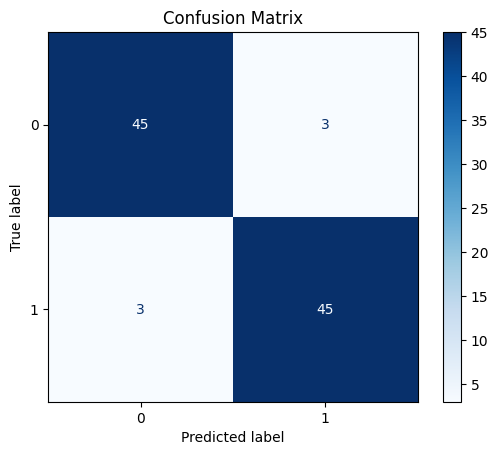

In [ ]:
plot_confusion_matrix(y_test, y_pred_tree)

### 8.2. ROC Curve of Decision Tree

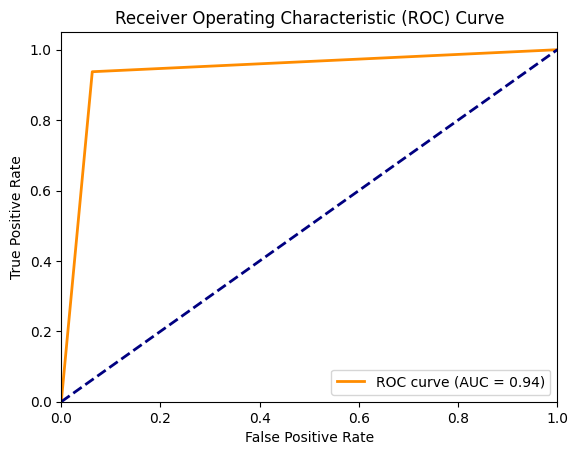

In [ ]:
plot_roc_curve(y_test, y_pred_tree)

### 8.3. Confusion matrix of Logistic Regression

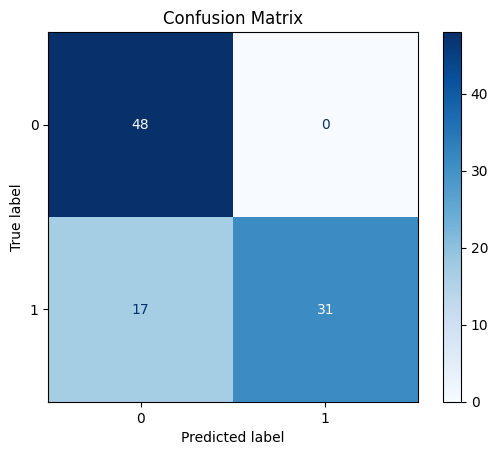

In [ ]:
plot_confusion_matrix(y_test, y_pred_log)

### 8.4. ROC curve of Logistic Regression

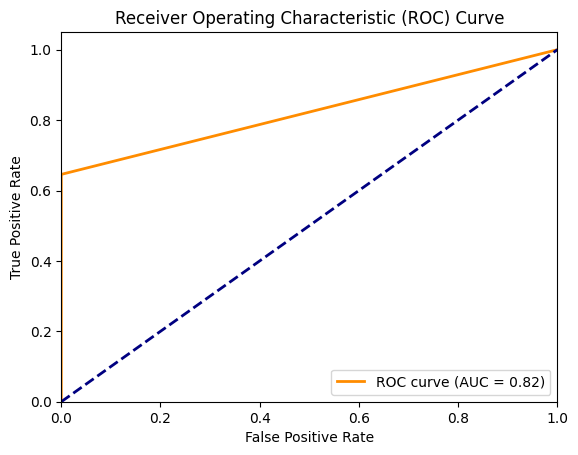

In [ ]:
y_pred_prob = log_reg.predict_proba(X_test)  # This will give probabilities
plot_roc_curve(y_test, y_pred_prob)

### 8.5. Confusion matrix of CNN (New)

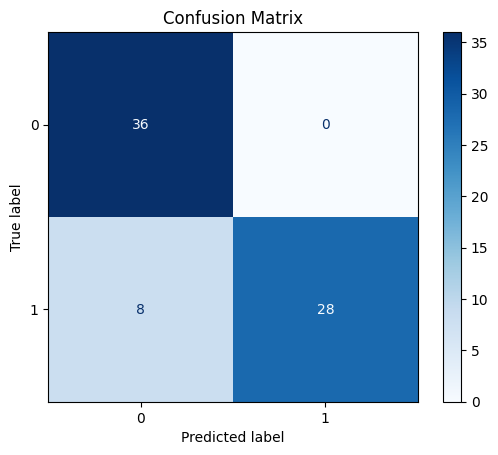

In [ ]:
plot_confusion_matrix(y_test_img, y_pred_cnn)

### 8.6. ROC curve of CNN

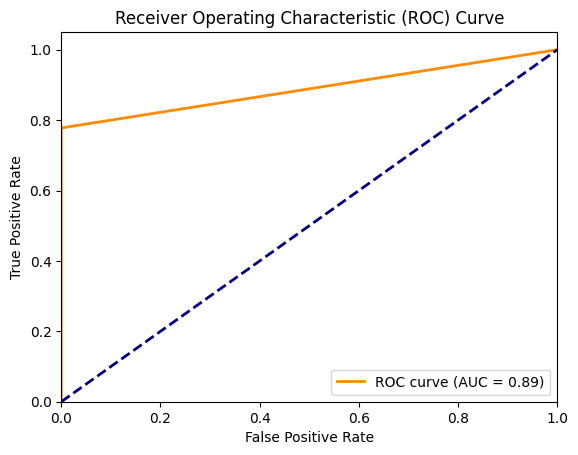

In [ ]:
plot_roc_curve(y_test_img, y_pred_cnn)

### 8.7. Confusion matrix of CRNN

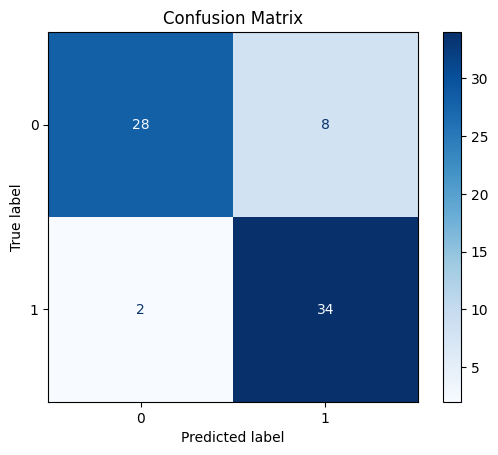

In [ ]:
plot_confusion_matrix(y_test_img, y_pred_crnn)

### 8.8. ROC curve of RCNN

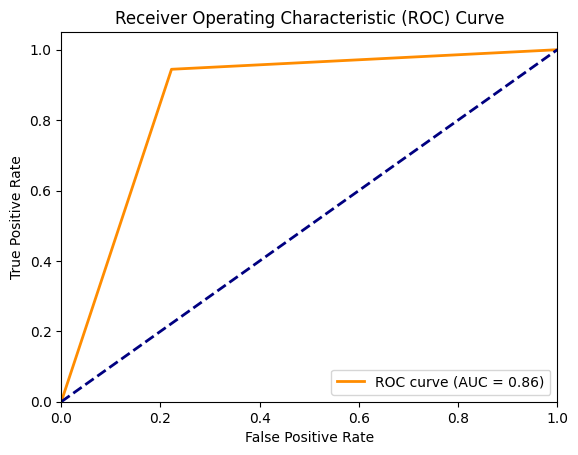

In [ ]:
plot_roc_curve(y_test_img, y_pred_crnn)

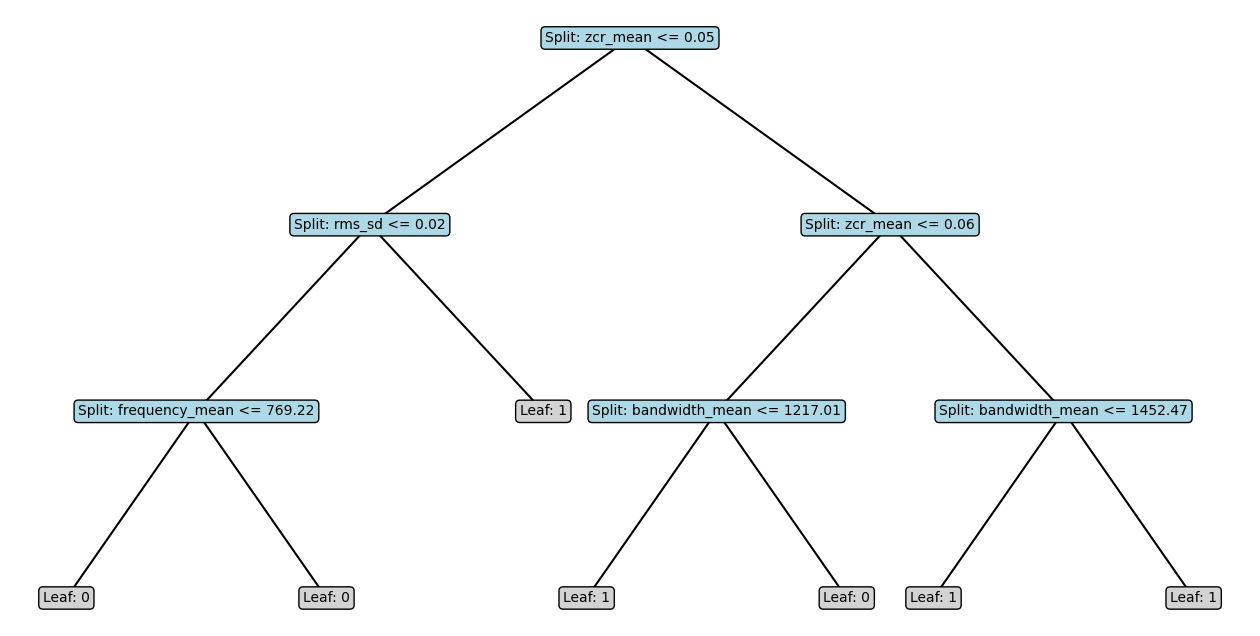

In [ ]:
def plot_tree(node, depth=0, pos=(0, 0), parent=None, ax=None, x_offset=1.0, y_offset=1.0):
    """
    Recursively plot the decision tree using matplotlib, with different colors for leaves and custom feature names.
    """
    feature_names = ["rms_mean", "rms_sd", "zcr_mean", "zcr_sd", "frequency_mean", "frequency_sd", "bandwidth_mean", "bandwidth_sd"]

    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_axis_off()

    # Plot current node
    if "label" in node:
        # Leaf node: Make it a different color (green)
        node_label = f"Leaf: {int(node['label'])}"
        ax.text(pos[0], pos[1], node_label, va="center", ha="center",
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'))
    else:
        # Internal node: Replace X[axis] with the feature name
        feature_name = feature_names[node['axis']]
        node_label = f"Split: {feature_name} <= {node['threshold']:.2f}"
        ax.text(pos[0], pos[1], node_label, va="center", ha="center",
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))

    # Draw line to parent node (if any)
    if parent is not None:
        ax.plot([parent[0], pos[0]], [parent[1], pos[1]], color='black')

    if "label" not in node:
        # Recursively plot left and right subtrees
        left_pos = (pos[0] - x_offset / (depth + 2), pos[1] - y_offset)
        right_pos = (pos[0] + x_offset / (depth + 2), pos[1] - y_offset)
        plot_tree(node["left"], depth + 1, left_pos, pos, ax, x_offset, y_offset)
        plot_tree(node["right"], depth + 1, right_pos, pos, ax, x_offset, y_offset)

    # Display the final plot
    if depth == 0:
        plt.show()

plot_tree(tree.tree)

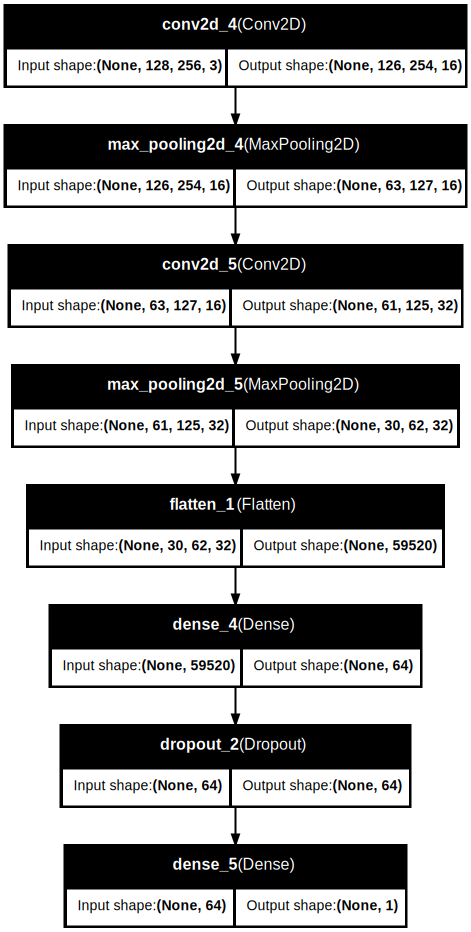

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, display
from tensorflow.keras.utils import model_to_dot
# Visualize the model's architecture and convert it to an SVG format
svg_image = SVG(model_to_dot(cnn_model, show_shapes=True, show_layer_names=True, dpi=72).create_svg())
# Display the SVG image inline in the Jupyter notebook
display(svg_image)

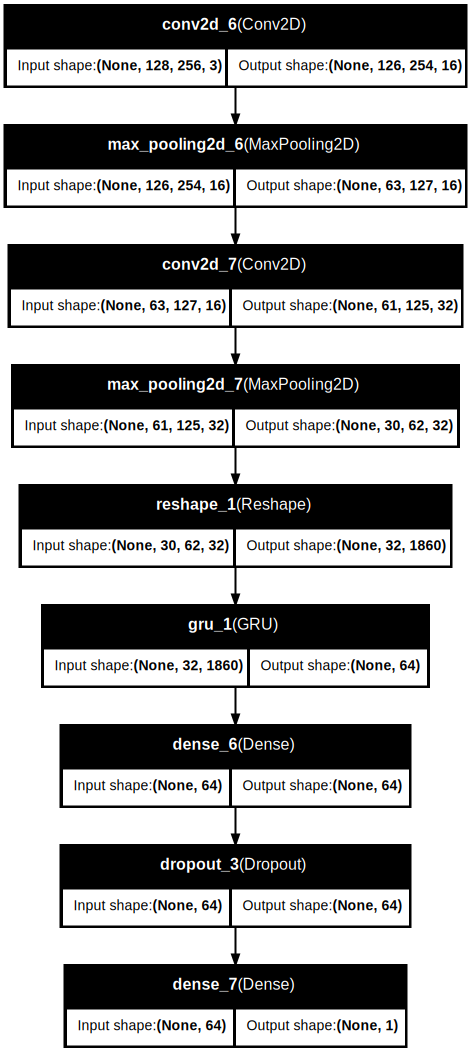

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, display
from tensorflow.keras.utils import model_to_dot
# Visualize the model's architecture and convert it to an SVG format
svg_image = SVG(model_to_dot(crnn_model, show_shapes=True, show_layer_names=True, dpi=72).create_svg())
# Display the SVG image inline in the Jupyter notebook
display(svg_image)

### 8.5. Conclusion (Rewritten)

The confusion matrix and ROC curve for four models reaffirm the findings discussed in Section 7. In assignment 1, I was able to observe that the logistic regression outperforms the decision tree with the dataset of 120 samples. I wrote that this might be due to the small size of dataset as decision trees tend to overfit by splitting the data into increasingly smaller group. In assignment 2, with larger dataset, the performance of the decision tree was much better than the logistic regression.


The CNN and RCNN models also produced promising results in distinguishing between Haechan's and Hayoung's voices. Interestingly, the CNN model did a much better job classifying Hayoung's voice than Haechan's while the RCNN model did a much better job classifying Haechan's voice over Hayoung's. One possible reason would be some time-varying features (e.g., varying tone, pauses, or rhythm) in Haechan's voice. If his voice exhibited more dynamic features, these would have aligned better with the CRNN's ability to model sequences and temporal dependencies.

## 9. Executive Summary

1. **Introduction & Data Description**: The project focuses on audio classification by analyzing various acoustic features. We started by importing a dataset consisting of audio files, which were pre-processed and transformed to ensure uniformity and quality for model training. These files were converted into WAV format to allow for further manipulation and analysis.

2. **Data Importation**: In this phase, essential libraries such as numpy, librosa, and pandas were used to handle audio files and manage datasets. The audio files were reduced in size and resampled to make them uniform. This preprocessing step was critical for handling data variability, ensuring consistent analysis across all files.

3. **Exploratory Data Analysis (EDA) & Preprocessing**: We conducted an initial exploratory data analysis (EDA) to understand the characteristics of the dataset. Key acoustic features such as waveforms, root mean square (RMS) energy, zero-crossing rate (ZCR), and pitch contours were plotted to observe trends and patterns in the audio signals. This visual exploration allowed us to assess variability between different classes of audio. Additionally, we checked for potential biases by measuring the average length of each audio category, ensuring that the dataset was balanced. The next step was extracting a comprehensive set of acoustic parameters for each file, which would later serve as input features for model training. For image-based models, we transformed each audio file into Mel Spectrogram so that they can be used for training.

4. **Task Description & Data Split**: Following feature extraction and image transformation, we split the data into training and testing sets. This step ensured that our models were evaluated on unseen data to avoid overfitting and to get a realistic estimate of model performance.

5. **Model Selection**: Four models were selected for this classification task: Decision Tree, Logistic Regression, CNN, and CRNN. Pseudocode was provided for both models to outline their algorithms. The Decision Tree model splits the dataset into smaller subsets based on feature values, forming a tree structure, while Logistic Regression models the probability that a given sample belongs to a specific class using a linear decision boundary. The CNN model extracts spatial features from data by applying convolutional filters and pooling operations. CRNN model combines CNN for spatial feature extraction and RNN for capturing temporal dependencies in sequential data.


6. **Model Training** The Decision Tree model underwent hyperparameter tuning to find the optimal maximum depth and splitting criterion. After tuning, both the Decision Tree and Logistic Regression models were trained on the extracted acoustic features. The CNN and CRNN models were trained on the Mel Spectrograms created from each audio file. The goal was to compare their performance in terms of accuracy, precision, recall, F1-score, and AUC-ROC. The following two images are the diagram of prediction pipeline of the trained models.

![decision tree_pipeline.png](https://drive.google.com/uc?export=view&id=1qkO2Qm1BrYqPwxcjsKJmZiuRXfzufeuv)

![logistic_regression_pipeline.png](https://drive.google.com/uc?export=view&id=1PKm2A0h5yA7SsOfYAci3DhlPrmy4475D)


7. **Prediction & Performance**: All models were tested on the unseen data to assess their classification performance. They were evaluated based on the accuracy, precision, recall, f1 score, and AUC score. Decision Tree outperformed Logistic Regression, and CNN and CRNN each revealed different strengths in classifying specific class.

$$
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
\text{Model} & \text{Accuracy (\%)} & \text{Precision (\%)} & \text{Recall (\%)} & \text{F1} & \text{AUC} \\ \hline
\text{Decision Tree} & 93.75 & 93.75 & 93.75 & 0.94 & 0.94 \\ \hline
\text{Logistic Regression} & 82.29 & 100.00 & 64.58 & 0.78 & 0.82 \\ \hline
\text{CNN} & 88.89 & 100.00 & 77.78 & 0.88 & 0.89 \\ \hline
\text{CRNN} & 86.11 & 80.95 & 94.44 & 0.87 & 0.86 \\ \hline
\end{array}
$$


8. **Visualization & Conclusion**: We visualized the confusion matrix, which provides insight into true positive, true negative, false positive, and false negative predictions. Additionally, ROC curves and AUC scores were plotted to evaluate the ability of each model to discriminate between classes. All four models provided promising results for distinguishing between the two audio categories.

**Key Insights & Further Improvements**
- Logistic Regression performed better than the Decision Tree, which suggests that the dataset might have patterns that a simpler, linear model like Logistic Regression can capture more effectively. The performance of Decision Tree might also be due to overfitting, which could be improved by using techniques like pruning the tree or limiting how deep it can grow, preventing it from becoming too complex.

- Another area for improvement is in the features we use. Currently, we focus on acoustic features, but there are other useful features, such as analyzing spectral properties or temporal patterns in the audio, which might help both models perform better. Also, adding regularization to Logistic Regression could prevent it from overfitting as we explore more complex feature sets.

- There’s also an opportunity to expand the approach by incorporating image-based models. For example, we could convert the audio files into spectrograms (visual representations of sound) and then use convolutional neural networks (CNNs) to classify the audio based on these images. This could potentially capture patterns that are missed in traditional feature extraction.

- Additionally, we could explore collecting more data, especially with samples of both voices speaking English. While our voices may differ in Korean, there’s a possibility that our accents are more similar in English, which could confuse people. By including English audio in the dataset, we could better understand these nuances and potentially improve the classification model's performance across both languages.

## 10. References

- https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88
- https://wandb.ai/mostafaibrahim17/ml-articles/reports/An-Introduction-to-Audio-Classification-with-Keras--Vmlldzo0MDQzNDUy
- https://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/
- https://towardsdatascience.com/voice-classification-using-deep-learning-with-python-6eddb9580381
- https://www.tensorflow.org/io/tutorials/audio
- https://github.com/SreeRamTholeti/VoiceBasedGenderClassification/blob/master/VoiceBasedGenderClassification.ipynb
- https://github.com/nicknochnack/DeepAudioClassification/blob/main/AudioClassification.ipynb
- https://towardsdatascience.com/music-genre-classification-using-a-divide-conquer-crnn-2ff1cf49859f
- https://wandb.ai/mostafaibrahim17/ml-articles/reports/An-Introduction-to-Audio-Classification-with-Keras--Vmlldzo0MDQzNDUy